In [1]:
import networkx as nx
file_path = 'C:/Users/maria/OneDrive/Documentos/CS_Clases/Massive_Graphs/Deliveries/web-Stanford.txt'

# Initialize an empty directed graph
G = nx.DiGraph()

with open(file_path, 'r') as file:
    for line in file:
        # Skip comments and empty lines
        if line.startswith('#') or not line.strip():
            continue

        # Build graph
        source, target = line.strip().split()[:2]
        G.add_edge(source, target)

print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Loaded graph with 281903 nodes and 2312497 edges.


In [2]:
# Basic properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")


Number of nodes: 281903
Number of edges: 2312497
Is the graph directed: True


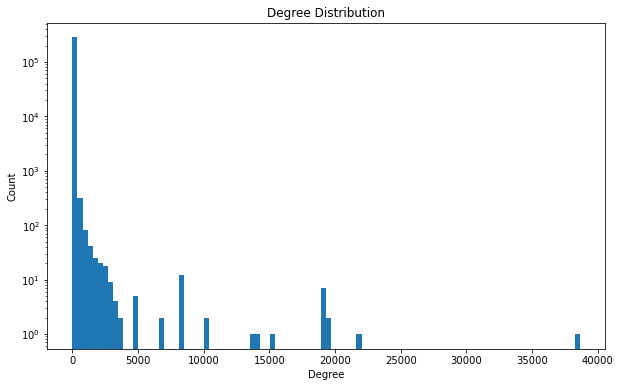

In [3]:
import matplotlib.pyplot as plt

degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, log=True)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


In [4]:
# Strongly connected components
strongly_connected_components = nx.strongly_connected_components(G)
largest_scc = max(strongly_connected_components, key=len)
print(f"Number of nodes in the largest strongly connected component: {len(largest_scc)}")

# Weakly connected components
weakly_connected_components = nx.weakly_connected_components(G)
largest_wcc = max(weakly_connected_components, key=len)
print(f"Number of nodes in the largest weakly connected component: {len(largest_wcc)}")


Number of nodes in the largest strongly connected component: 150532
Number of nodes in the largest weakly connected component: 255265


In [5]:
# Compute PageRank for the nodes in the graph
pagerank = nx.pagerank(G, max_iter=100)

# Identify the node with the highest PageRank
max_pagerank_node = max(pagerank, key=pagerank.get)
max_pagerank = pagerank[max_pagerank_node]

print(f"Node with highest PageRank: {max_pagerank_node}, PageRank: {max_pagerank}")


Node with highest PageRank: 89073, PageRank: 0.010006381216752553


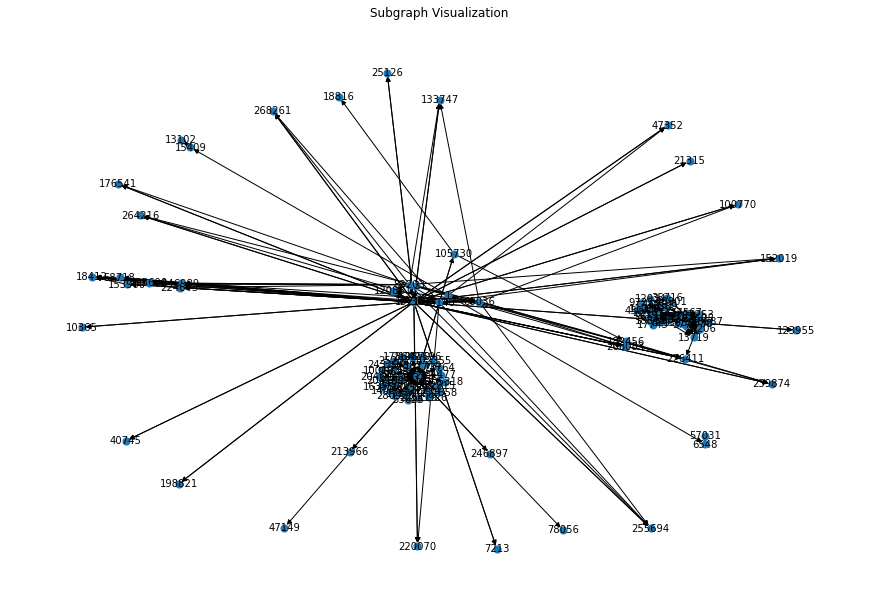

In [6]:
# Visualize a subgraph of the first 100 nodes
subgraph_nodes = list(G.nodes())[:100]
H = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_size=50, font_size=10)
plt.title("Subgraph Visualization")
plt.show()


# Louvain

In [7]:
import networkx as nx
from networkx.algorithms.community import louvain_communities

# Convert to undirected graph for Louvain method
G_undirected = G.to_undirected()

# Run Louvain community detection
#louvain_communities(G, weight='weight', resolution=1, threshold=1e-07, seed=None)
#  PARAMETERS
#    G - NetworkX graph
#    weight -string or None, optional (default=”weight”) The name of an edge attribute that holds the numerical value used as a weight. If None then each edge has weight 1.
#    resolution - float, optional (default=1) If resolution is less than 1, the algorithm favors larger communities. Greater than 1 favors smaller communities
#    threshold - float, optional (default=0.0000001) Modularity gain threshold for each level. If the gain of modularity between 2 levels of the algorithm is less than the given threshold then the algorithm stops and returns the resulting communities.
#    seed - integer, random_state, or None (default) Indicator of random number generation state. See Randomness.

communities = louvain_communities(G_undirected, resolution=1, threshold=1e-07)
#Returns:list - A list of sets (partition of G). Each set represents one community and contains all the nodes that constitute it.

# Display the communities
for i, community in enumerate(communities):
    communities_sizes.append(len(community))
    print(f"Community {i}: Size {len(community)}")
    # Print some nodes of the community
    print(f"Nodes: {list(community)[:5]}")  # Show first 5 nodes as an example


Community 0: Size 6673
Nodes: ['108307', '3844', '273570', '131196', '66425']
Community 1: Size 2672
Nodes: ['196761', '271331', '99283', '163785', '254296']
Community 2: Size 4
Nodes: ['41825', '180949', '76448', '13']
Community 3: Size 5756
Nodes: ['123637', '116872', '98852', '174831', '162878']
Community 4: Size 111
Nodes: ['185846', '183607', '169215', '254483', '173701']
Community 5: Size 386
Nodes: ['161309', '81284', '205291', '195916', '8027']
Community 6: Size 70
Nodes: ['262665', '165561', '164345', '175595', '95919']
Community 7: Size 53
Nodes: ['75629', '28671', '26361', '43034', '103253']
Community 8: Size 261
Nodes: ['12059', '235059', '169258', '255238', '18351']
Community 9: Size 47
Nodes: ['31023', '20015', '43452', '145017', '32694']
Community 10: Size 175
Nodes: ['5737', '17301', '114325', '130750', '154017']
Community 11: Size 1072
Nodes: ['187624', '114447', '127815', '104717', '17798']
Community 12: Size 314
Nodes: ['139475', '123603', '255045', '166661', '236800

In [12]:
communities_sizes = []
# Display the communities
for i, community in enumerate(communities):
    communities_sizes.append(len(community))
    print(f"Community {i}: Size {len(community)}")
    # Print some nodes of the community
    print(f"Nodes: {list(community)[:5]}")  # Show first 5 nodes as an example

Community 0: Size 6673
Nodes: ['108307', '3844', '273570', '131196', '66425']
Community 1: Size 2672
Nodes: ['196761', '271331', '99283', '163785', '254296']
Community 2: Size 4
Nodes: ['41825', '180949', '76448', '13']
Community 3: Size 5756
Nodes: ['123637', '116872', '98852', '174831', '162878']
Community 4: Size 111
Nodes: ['185846', '183607', '169215', '254483', '173701']
Community 5: Size 386
Nodes: ['161309', '81284', '205291', '195916', '8027']
Community 6: Size 70
Nodes: ['262665', '165561', '164345', '175595', '95919']
Community 7: Size 53
Nodes: ['75629', '28671', '26361', '43034', '103253']
Community 8: Size 261
Nodes: ['12059', '235059', '169258', '255238', '18351']
Community 9: Size 47
Nodes: ['31023', '20015', '43452', '145017', '32694']
Community 10: Size 175
Nodes: ['5737', '17301', '114325', '130750', '154017']
Community 11: Size 1072
Nodes: ['187624', '114447', '127815', '104717', '17798']
Community 12: Size 314
Nodes: ['139475', '123603', '255045', '166661', '236800

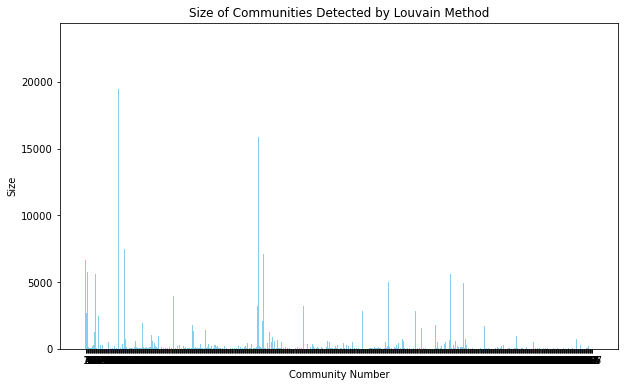

In [14]:

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(communities_sizes)), communities_sizes, color='skyblue')
plt.xlabel('Community Number')
plt.ylabel('Size')
plt.title('Size of Communities Detected by Louvain Method')
plt.xticks(range(len(communities_sizes)), [f"{i+1}" for i in range(len(communities_sizes))])
plt.show()

Number of Communities 757


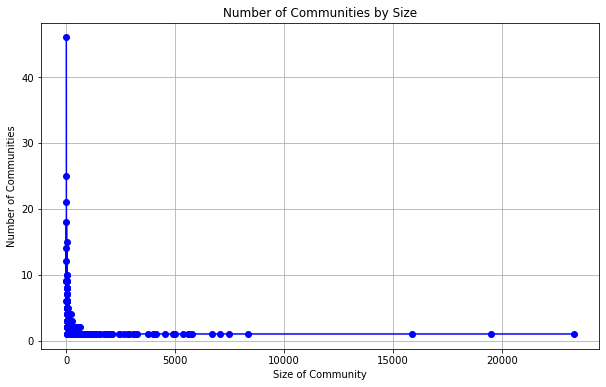

In [22]:
from collections import Counter

print('Number of Communities', len(communities_sizes))

# Counting the number of communities of each size
size_counts = Counter(communities_sizes)

# Sorting the sizes for plotting
sorted_sizes = sorted(size_counts.keys())
counts = [size_counts[size] for size in sorted_sizes]

# Plotting the number of communities by their size
plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, counts, marker='o', linestyle='-', color='blue')
plt.xlabel('Size of Community')
plt.ylabel('Number of Communities')
plt.title('Number of Communities by Size')
plt.grid(True)
plt.show()

In [23]:
size_counts

Counter({6673: 1,
         2672: 1,
         4: 21,
         5756: 1,
         111: 3,
         386: 1,
         70: 4,
         53: 5,
         261: 1,
         47: 10,
         175: 1,
         1072: 1,
         314: 1,
         1237: 1,
         71: 3,
         5643: 1,
         59: 4,
         109: 1,
         110: 1,
         2439: 1,
         4519: 1,
         783: 1,
         268: 1,
         36: 9,
         137: 2,
         263: 3,
         493: 1,
         60: 1,
         11: 15,
         377: 1,
         40: 5,
         8: 14,
         19: 7,
         877: 1,
         508: 2,
         10: 6,
         161: 3,
         52: 3,
         91: 2,
         3767: 1,
         43: 6,
         3: 25,
         243: 1,
         227: 4,
         23: 8,
         49: 5,
         246: 1,
         140: 2,
         19494: 1,
         54: 3,
         79: 2,
         17: 9,
         371: 1,
         357: 1,
         51: 7,
         57: 3,
         7446: 1,
         744: 1,
         156: 2,
       

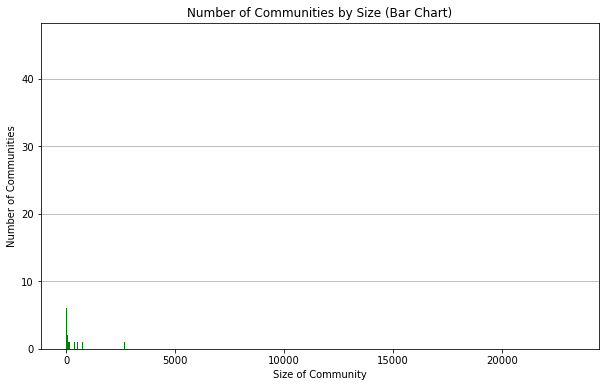

In [20]:
# Plotting the number of communities by their size using a bar chart for clearer visualization
plt.figure(figsize=(10, 6))
plt.bar(sorted_sizes, counts, color='green')
plt.xlabel('Size of Community')
plt.ylabel('Number of Communities')
plt.title('Number of Communities by Size (Bar Chart)')
plt.grid(axis='y')
plt.show()